<a href="https://colab.research.google.com/github/fish34/sberbank_data_analysis/blob/master/HW%201/HW1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd # импортируем Pandas
import numpy as np
%matplotlib inline

In [3]:
# считываем данные
# https://www.kaggle.com/c/titanic/data
!git clone https://github.com/fish34/sberbank_data_analysis.git
!ls
data = pd.read_csv('/content/sberbank_data_analysis/data/titanic/train.csv', sep=',', header='infer')

Cloning into 'sberbank_data_analysis'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 140 (delta 28), reused 21 (delta 21), pack-reused 97
Receiving objects: 100% (140/140), 14.17 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (45/45), done.
sample_data  sberbank_data_analysis


Описание структуры:

Pclass — класс пассажира (1 — первый, 2 — средний, 3 — третий);

Name — имя;

Sex — пол;

Age — возраст;
Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов 
на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

Гипотеза 1: Процент числа выживших пассажиров из Саутгемптона выше, чем из Шербура или Квинстауна.

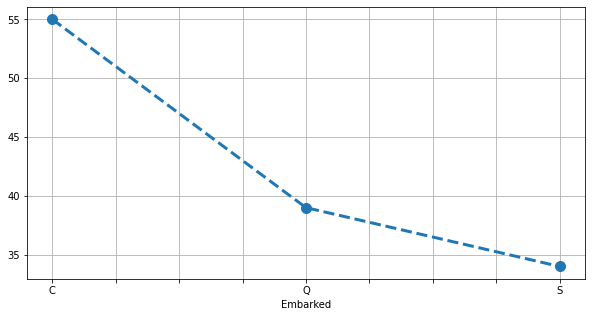

In [18]:
series = round(100 * data.groupby(['Embarked'])['Survived'].sum() / data.groupby(['Embarked'])['Survived'].count())
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

Гипотеза не подтвердилась. Число выживших пассажиров из Саутгемптона оказалось меньше всех.

Гипотеза 2: Больше выживших было среди молодых девушек, нежели женщин

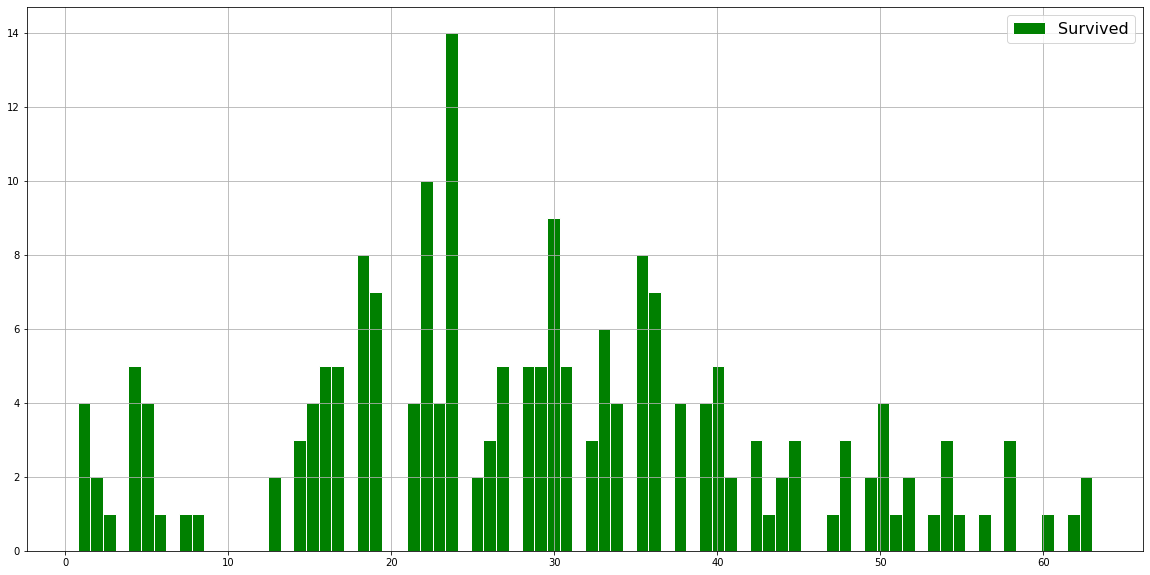

In [32]:
ax = data[(data['Survived'] == 1)& (data['Sex'] == 'female')]['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')

ax.legend(['Survived'], prop={'size':16})

Гипотеза подтердилась.

Гипотеза 3: Больше всего выживших было серди женщин из первого класса


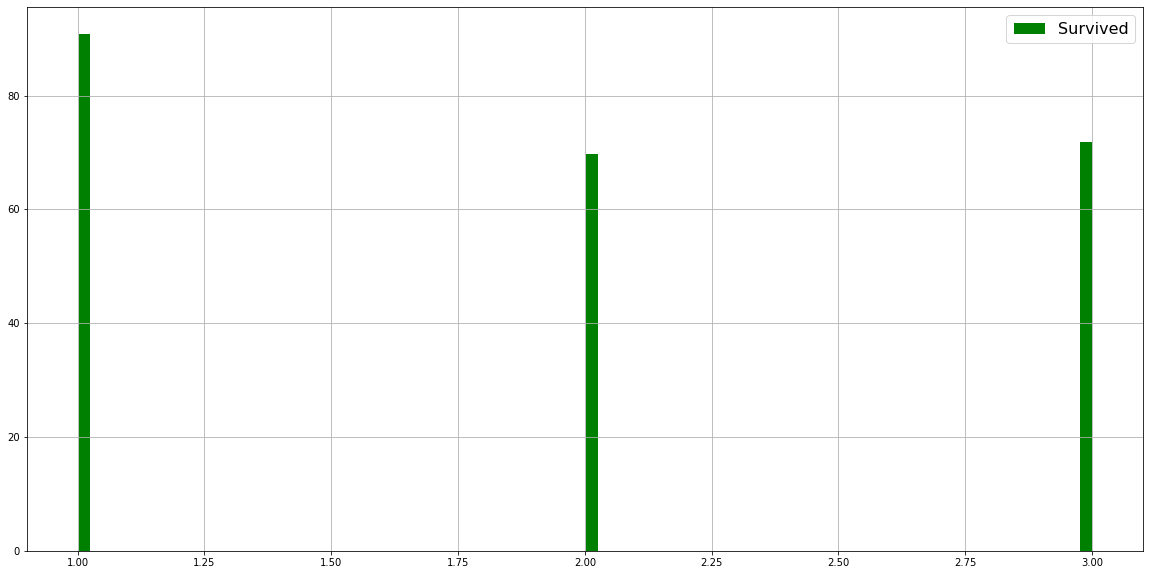

In [39]:
ax = data[(data['Survived'] == 1)& (data['Sex'] == 'female')]['Pclass'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')

ax.legend(['Survived'], prop={'size':16})

Гипотеза подтвердилась.
